東京都で公式にgithubで管理されている新型コロナウイルスのデータのJsonファイルを  Pythonで読み込むサンプル

東京都で公式にgithub  
[https://github.com/tokyo-metropolitan-gov/covid19]


- Data.jsonを 2020/3/11　時点の物を入れていますが、最新版を上記githubから取得して置き換えてください。
- 環境により表のフォントが豆腐（□）になりますが、各自、必要なら直してください。
- 動作確認
 - OS      :Windows 10 、 Ubuntu 18 
 - Jupyter ：6.0.1
 - Python  :3.7.4
 - Pandas  : 0.25.0 , 0.25.1 , 1.0.1

In [1]:
%matplotlib inline
 
import pandas as pd
import json
import codecs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import platform

font_name_dic = {'Windows':'MS Gothic','Darwin':'AppleGothic','Linux':'Noto Sans CJK JP'}
os_name = platform.system()
font_name = font_name_dic.get(os_name,'Unknown OS and Font')
    
# Read covid19 data.json
with codecs.open(r'data.json','r','utf8') as fp:
    dat_json =   fp.read()
json_data = json.loads (dat_json)

def show_plot( df , columns , title = '',  x_skip = 4 ):
    """
    Show plot DataFrame easily 
    Args:
        df       DataFrame : your Data
        columns list       : target column names
        title   str        : chart title
        x_skip  int        : x axis tickers skip count
    """
    
    global font_name
    
    font = {'family' : font_name ,
            'weight' : 'bold',
            'size'   : 10}
    plt.rc('font', **font)


    df[columns].plot()
    plt.title(title)
    plt.show()
    
def show_time_series_plot( df , datetime_column , columns , title = '', date_format = "%Y/%m/%d" , x_skip = 4):
    """
    Show plot DataFrame easily 
    Args:
        df              DataFrame : your Data
        datetime_column str       : tile series collumn name
        columns         list      : target column names
        title           str       : chart title
        x_skip          int       : x axis tickers skip count
    """

    global font_name

    font = {'family' : font_name,
            'weight' : 'bold',
            'size'   : 10}
    plt.rc('font', **font)

    df[columns].plot()
    arry1 = np.array(range(len(df.index)))
    arry2 = np.array(list(df[datetime_column].dt.strftime(date_format)))
    skip_idxs = np.arange(len(arry1)) % (x_skip+1) == 0
    plt.xticks(arry1[skip_idxs],arry2[skip_idxs], rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


    plt.title(title)
    plt.show()

def conv2df(json_data,target):
    """
    convert json to DataFrame easily
    Args:
        df              DataFrame : your Data
                                target data
                                  'contacts',
                                  'querents',
                                  'patients',
                                  'patients_summary',
                                  'discharges_summary'
        datetime_column str       : tile series collumn name
        columns         list      : target column names
        title           str       : chart title
        x_skip          int       : x axis tickers skip count
    """

    blank = {}
    df = pd.DataFrame({})
    keys = list(json_data[target]['data'][0].keys())
    for key in keys:
        blank[key] = []
    df = pd.DataFrame(blank)
    keys = list(json_data[target]['data'][0].keys())

    for idx,dat in enumerate(json_data[target]['data']):
        for key in keys:
            df.loc[idx,key] = dat[key]
            
    if 'date' in list(df.columns) :
        df['pd date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
    if '判明日' in list(df.columns) :
        df['pd date'] = pd.to_datetime(df['判明日'] , format='%m/%d/%Y')
    if '日付' in list(df.columns) :
        df['pd 日付'] = pd.to_datetime(df['日付'] , format='%Y-%m-%dT08:00:00.000Z')
    if 'リリース日' in list(df.columns) :
        df['pd リリース日'] = pd.to_datetime(df['リリース日'] , format='%Y-%m-%dT08:00:00.000Z')
        
    
    return df

In [2]:
df_querents = conv2df(json_data,'querents')
df_querents['9-17時'] = df_querents['9-17時'].astype(int)
df_querents['17-翌9時'] = df_querents['17-翌9時'].astype(int)
df_querents['小計'] = df_querents['小計'].astype(int)
df_querents['w'] = df_querents['w'].astype(int)
df_querents

,日付,曜日,9-17時,17-翌9時,date,w,short_date,小計,pd date,pd 日付
0,2020-02-07T08:00:00.000Z,金,0,17,2020-02-07,5,02/07,17,2020-02-07,2020-02-07
1,2020-02-08T08:00:00.000Z,土,25,9,2020-02-08,6,02/08,34,2020-02-08,2020-02-08
2,2020-02-09T08:00:00.000Z,日,26,9,2020-02-09,0,02/09,35,2020-02-09,2020-02-09
3,2020-02-10T08:00:00.000Z,月,116,21,2020-02-10,1,02/10,137,2020-02-10,2020-02-10
4,2020-02-11T08:00:00.000Z,火,25,7,2020-02-11,2,02/11,32,2020-02-11,2020-02-11
5,2020-02-12T08:00:00.000Z,水,124,23,2020-02-12,3,02/12,147,2020-02-12,2020-02-12
6,2020-02-13T08:00:00.000Z,木,124,32,2020-02-13,4,02/13,156,2020-02-13,2020-02-13
7,2020-02-14T08:00:00.000Z,金,245,106,2020-02-14,5,02/14,351,2020-02-14,2020-02-14
8,2020-02-15T08:00:00.000Z,土,72,84,2020-02-15,6,02/15,156,2020-02-15,2020-02-15
9,2020-02-16T08:00:00.000Z,日,90,96,2020-02-16,0,02/16,186,2020-02-16,2020-02-16


In [3]:
df_patients = conv2df(json_data,'patients')
df_patients['曜日'] = df_patients['曜日'].astype(int)
df_patients

,リリース日,曜日,居住地,年代,性別,退院,date,pd date,pd リリース日
0,2020-01-24T08:00:00.000Z,43854,湖北省武漢市,40代,男性,〇,2020-01-24,2020-01-24,2020-01-24
1,2020-01-25T08:00:00.000Z,43855,湖北省武漢市,30代,女性,〇,2020-01-25,2020-01-25,2020-01-25
2,2020-01-30T08:00:00.000Z,43860,湖南省長沙市,30代,女性,〇,2020-01-30,2020-01-30,2020-01-30
3,2020-02-13T08:00:00.000Z,43874,都内,70代,男性,None,2020-02-13,2020-02-13,2020-02-13
4,2020-02-14T08:00:00.000Z,43875,都内,50代,女性,〇,2020-02-14,2020-02-14,2020-02-14
...,...,...,...,...,...,...,...,...,...
62,2020-03-07T08:00:00.000Z,43897,都内,50代,女性,None,2020-03-07,2020-03-07,2020-03-07
63,2020-03-07T08:00:00.000Z,43897,都内,70代,男性,None,2020-03-07,2020-03-07,2020-03-07
64,2020-03-10T08:00:00.000Z,43900,都内,50代,男性,None,2020-03-10,2020-03-10,2020-03-10
65,2020-03-10T08:00:00.000Z,43900,都内,70代,男性,None,2020-03-10,2020-03-10,2020-03-10


In [4]:
df_patients_summary = conv2df(json_data,'patients_summary')
df_patients_summary['小計'] = df_patients_summary['小計'].astype(int)
df_patients_summary

,日付,小計,pd 日付
0,2020-01-24T08:00:00.000Z,1,2020-01-24
1,2020-01-25T08:00:00.000Z,1,2020-01-25
2,2020-01-26T08:00:00.000Z,0,2020-01-26
3,2020-01-27T08:00:00.000Z,0,2020-01-27
4,2020-01-28T08:00:00.000Z,0,2020-01-28
5,2020-01-29T08:00:00.000Z,0,2020-01-29
6,2020-01-30T08:00:00.000Z,1,2020-01-30
7,2020-01-31T08:00:00.000Z,0,2020-01-31
8,2020-02-01T08:00:00.000Z,0,2020-02-01
9,2020-02-02T08:00:00.000Z,0,2020-02-02


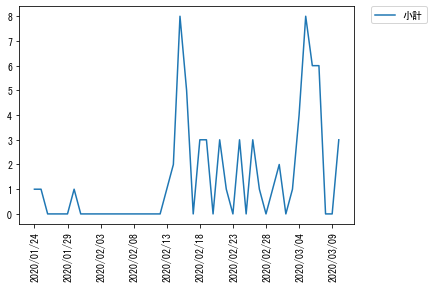

In [5]:
show_time_series_plot(df_patients_summary, 'pd 日付' , ['小計'])

In [6]:
df_discharges_summary = conv2df(json_data,'discharges_summary')
df_discharges_summary

,日付,小計,pd 日付
0,2020-01-24T08:00:00.000Z,1.0,2020-01-24
1,2020-01-25T08:00:00.000Z,1.0,2020-01-25
2,2020-01-26T08:00:00.000Z,0.0,2020-01-26
3,2020-01-27T08:00:00.000Z,0.0,2020-01-27
4,2020-01-28T08:00:00.000Z,0.0,2020-01-28
5,2020-01-29T08:00:00.000Z,0.0,2020-01-29
6,2020-01-30T08:00:00.000Z,1.0,2020-01-30
7,2020-01-31T08:00:00.000Z,0.0,2020-01-31
8,2020-02-01T08:00:00.000Z,0.0,2020-02-01
9,2020-02-02T08:00:00.000Z,0.0,2020-02-02


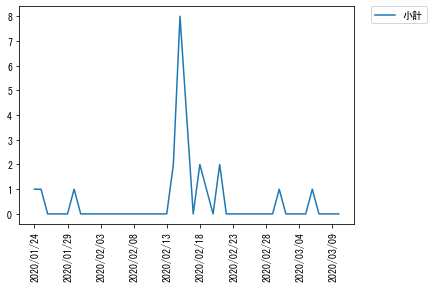

In [7]:
show_time_series_plot(df_discharges_summary, 'pd 日付' , ['小計'])

In [8]:
df_inspections = conv2df(json_data,'inspections')
for column in ['検査検体数','疑い例検査','接触者調査','陰性確認','（小計①）','チャーター便','クルーズ船','陰性確認2','（小計②）']:
    df_inspections[column] = df_inspections[column].astype(int)
df_inspections

,判明日,検査検体数,疑い例検査,接触者調査,陰性確認,（小計①）,チャーター便,クルーズ船,陰性確認2,（小計②）,pd date
0,1/24/2020,0,0,0,0,0,0,0,0,0,2020-01-24
1,1/25/2020,3,3,0,0,3,0,0,0,0,2020-01-25
2,1/26/2020,0,0,0,0,0,0,0,0,0,2020-01-26
3,1/27/2020,1,1,0,0,1,0,0,0,0,2020-01-27
4,1/28/2020,0,0,0,0,0,0,0,0,0,2020-01-28
5,1/29/2020,5,5,0,0,5,0,0,0,0,2020-01-29
6,1/30/2020,1,1,0,0,1,0,0,0,0,2020-01-30
7,1/31/2020,212,2,0,0,2,210,0,0,210,2020-01-31
8,2/1/2020,1,1,0,0,1,0,0,0,0,2020-02-01
9,2/2/2020,0,0,0,0,0,0,0,0,0,2020-02-02


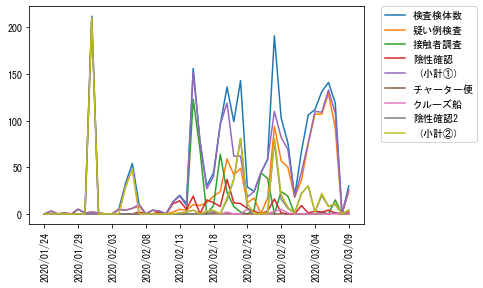

In [9]:
show_time_series_plot(df_inspections, 'pd date' , ['検査検体数','疑い例検査','接触者調査','陰性確認','（小計①）','チャーター便','クルーズ船','陰性確認2','（小計②）'])

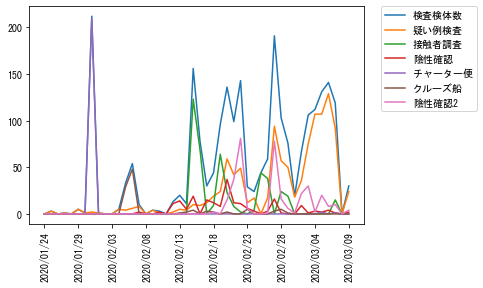

In [10]:
show_time_series_plot(df_inspections, 'pd date' , ['検査検体数','疑い例検査','接触者調査','陰性確認','チャーター便','クルーズ船','陰性確認2'])

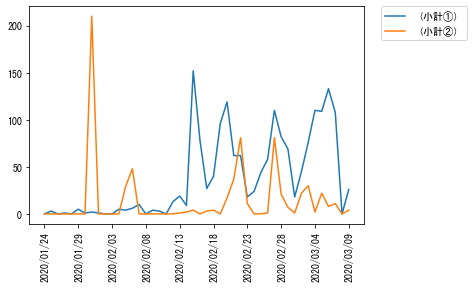

In [11]:
show_time_series_plot(df_inspections, 'pd date' , ['（小計①）','（小計②）'])

In [12]:
df_inspections_summary = pd.DataFrame(json_data['inspections_summary']['data'])
df_inspections_summary

,都内,その他
0,0,0
1,3,0
2,0,0
3,1,0
4,0,0
5,5,0
6,1,0
7,2,210
8,1,0
9,0,0


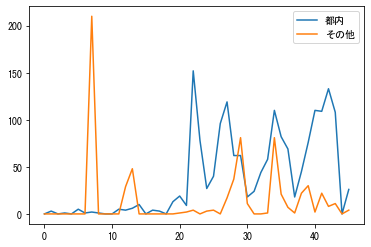

In [13]:
show_plot(df_inspections_summary,['都内','その他'])

In [14]:
df_better_patients_summary = pd.DataFrame(json_data['better_patients_summary']['data'])
df_better_patients_summary['pd date'] = pd.to_datetime(df_better_patients_summary.index , format='%Y-%m-%dT08:00:00.000Z')
df_better_patients_summary

,感染者数,退院者数,死亡者数,軽症,中等症,重症,pd date
2020-01-25T08:00:00.000Z,1,1,0.0,0.0,0.0,0.0,2020-01-25
2020-01-26T08:00:00.000Z,0,0,0.0,0.0,0.0,0.0,2020-01-26
2020-01-27T08:00:00.000Z,0,0,0.0,0.0,0.0,0.0,2020-01-27
2020-01-28T08:00:00.000Z,0,0,0.0,0.0,0.0,0.0,2020-01-28
2020-01-29T08:00:00.000Z,0,0,0.0,0.0,0.0,0.0,2020-01-29
2020-01-30T08:00:00.000Z,1,1,0.0,0.0,0.0,0.0,2020-01-30
2020-01-31T08:00:00.000Z,0,0,0.0,0.0,0.0,0.0,2020-01-31
2020-02-01T08:00:00.000Z,0,0,0.0,0.0,0.0,0.0,2020-02-01
2020-02-02T08:00:00.000Z,0,0,0.0,0.0,0.0,0.0,2020-02-02
2020-02-03T08:00:00.000Z,0,0,0.0,0.0,0.0,0.0,2020-02-03


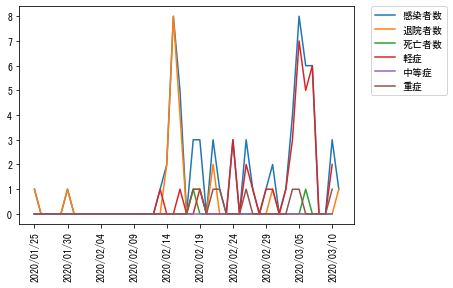

In [15]:
show_time_series_plot(df_better_patients_summary, 'pd date' , ['感染者数','退院者数','死亡者数','軽症','中等症','重症'])

In [16]:
json_data['lastUpdate']

'2020/03/11 8:00'

In [17]:
json_data['main_summary']

{'attr': '検査実施人数',
 'value': 1256,
 'children': [{'attr': '陽性患者数',
   'value': 67,
   'children': [{'attr': '入院中',
     'value': 43,
     'children': [{'attr': '軽症・中等症', 'value': 35},
      {'attr': '重症', 'value': 8}]},
    {'attr': '退院', 'value': 22},
    {'attr': '死亡', 'value': 2}]}]}